## 01 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io 
X_test = pd.read_csv(io.BytesIO(uploaded['x_test_without_nans.csv']))
X_train = pd.read_csv(io.BytesIO(uploaded['x_train_without_nans.csv']))
y_test = pd.read_csv(io.BytesIO(uploaded['y_test_without_nans.csv']))
y_train = pd.read_csv(io.BytesIO(uploaded['y_train_without_nans.csv']))

## 02 데이터 전처리

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
X_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SubjectID', 'Age', 'diag_delta',
       'onset_delta', 'diag_minus_onset', 'mean_bp_d', 'max_bp_s',
       'max_resp_rate', 'max_pulse', 'bp_s_slope', 'fvc_slope', 'fvc_max'],
      dtype='object')

In [5]:
X_test = X_test.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])
X_train = X_train.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])
y_test = y_test.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])
y_train = y_train.drop(columns=["Unnamed: 0", "Unnamed: 0.1", "SubjectID" ])

In [6]:
y_test['ALSFRS_slope']

0     -0.109807
1     -0.644876
2     -0.884848
3     -0.229560
4     -0.784002
         ...   
615   -0.118353
616   -0.668498
617   -0.784002
618   -1.357887
619   -0.891331
Name: ALSFRS_slope, Length: 620, dtype: float64

In [7]:
scaler = StandardScaler()
scaler.fit(X_test)
X_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, index=X_test.index, columns=X_test.columns)

scaler2 = StandardScaler()
scaler2.fit(X_train)
X_scaled = scaler2.transform(X_train)
X_train = pd.DataFrame(X_scaled, index=X_train.index, columns=X_train.columns)

y_test = y_test['ALSFRS_slope']

y_train = y_train['ALSFRS_slope']

## 03 모델 생성 및 학습하기 

### 03-1 XGBoost

In [8]:
from xgboost import XGBRegressor

In [9]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### 03-2 Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
fitted_model_lr = model_lr.fit(X_train, y_train)

In [12]:
fitted_model_lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [13]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,x_train1)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ALSFRS_slope   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     11.88
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           5.42e-22
Time:                        15:53:08   Log-Likelihood:                -1997.8
No. Observations:                2476   AIC:                             4020.
Df Residuals:                    2464   BIC:                             4089.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7508      0.011    -68.729      0.000      -0.772      -0.729
Age                 -0.0273      0.012     -2.293      0.022      -0.051      -0.004
diag_delta           0.0554      0.096      0.580      0.562      -0.132       0.243
onset_delta         -0.1731      0.129     -1.340      0.180      -0.426       0.080
diag_minus_onset    -0.0514      0.102     -0.503      0.615      -0.252       0.149
mean_bp_d           -0.0061      0.014     -0.446      0.655      -0.033       0.021
max_bp_s            -0.0092      0.014     -0.649      0.517      -0.037       0.019
max_resp_rate        0.0009      0.011      0.079      0.937      -0.021       0.023
max_pulse           -0.0437      0.011     -3.833      0.000      -0.066      -0.021
bp_s_slope          -0.0154      0.011     -1.407      0.160      -0.037       0.006
fvc_slope            0.0311      0.011      2.827      0.005       0.010       0.053
fvc_max              0.0294      0.011      2.642      0.008       0.008       0.051
==============================================================================
Omnibus:                      234.732   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.731
Skew:                          -0.718   Prob(JB):                     6.91e-77
Kurtosis:                       4.157   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
fitted_model_lr2.params

const              -0.750750
Age                -0.027348
diag_delta          0.055398
onset_delta        -0.173065
diag_minus_onset   -0.051394
mean_bp_d          -0.006116
max_bp_s           -0.009248
max_resp_rate       0.000882
max_pulse          -0.043667
bp_s_slope         -0.015428
fvc_slope           0.031065
fvc_max             0.029398
dtype: float64

### 03-3 Random forests

In [15]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

## 04 모델 학습 결과 평가하기 

### 04-1 MAE , RMSE, R2

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [17]:
# Predict를 수행하고 mean_absolute_error, rmse, r-squared 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('XGB R2:',  r2_score(y_test, pred_xgb))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))
print('LR R2:',  r2_score(y_test, pred_lr))

print('RF MAE:', mean_absolute_error(y_test, pred_rf))
print('RF RMSE:', sqrt(mean_squared_error(y_test, pred_rf)))
print('RF R2:',  r2_score(y_test, pred_rf))

XGB MAE: 0.4451477107170082
XGB RMSE: 0.575692219390109
XGB R2: -0.03799607395219606
LR MAE: 0.4246733592226545
LR RMSE: 0.5436508338714064
LR R2: 0.07433230378152933
RF MAE: 0.42611653984044656
RF RMSE: 0.5455670483622599
RF R2: 0.06779537318711493


### 04-2 Pearson correlation score

In [18]:
import scipy.stats as stats
print("XGF PC:", stats.pearsonr(x = y_test, y = pred_xgb))
print("LR PC:", stats.pearsonr(x = y_test, y = pred_lr))
print("RF PC:", stats.pearsonr(x = y_test, y = pred_rf))

XGF PC: (0.21471458060750293, 6.714418065835853e-08)
LR PC: (0.2851546897337228, 4.595754608834115e-13)
RF PC: (0.2705420561415547, 7.33283378807031e-12)


### 04-2 실제 값과 추측 값 시각화

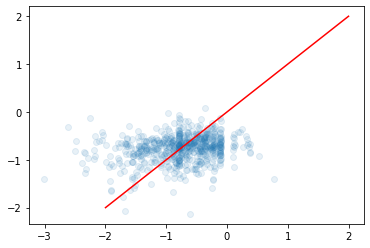

In [19]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

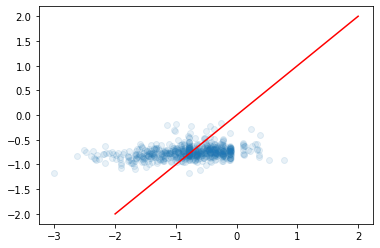

In [20]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

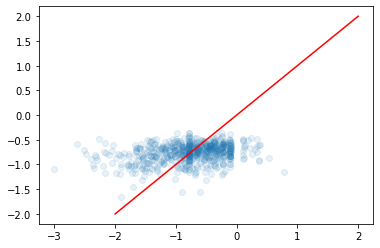

In [21]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_rf, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

### 04 -3 XGBoost, Random forest 모델의 Feature Importance 시각화

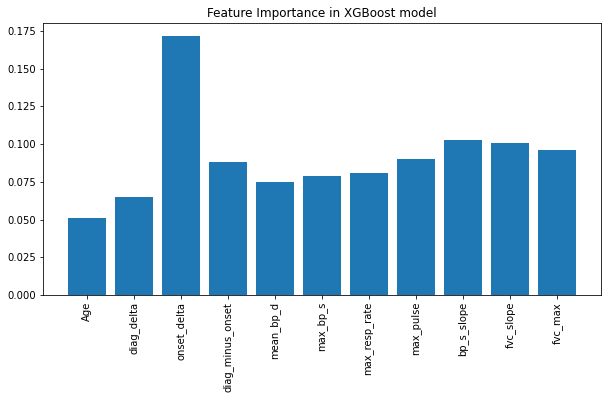

In [22]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

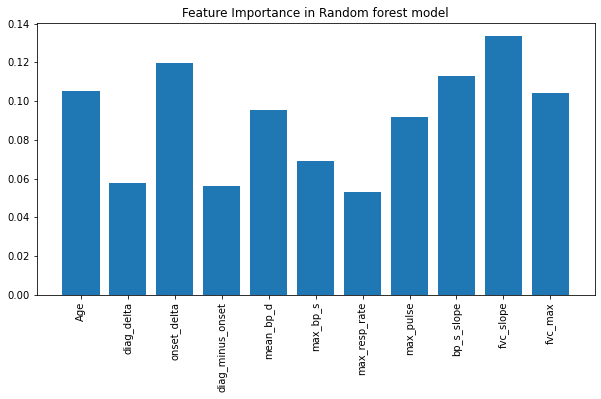

In [23]:
fig2 = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random forest model')
plt.show()

### 상관행렬 heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

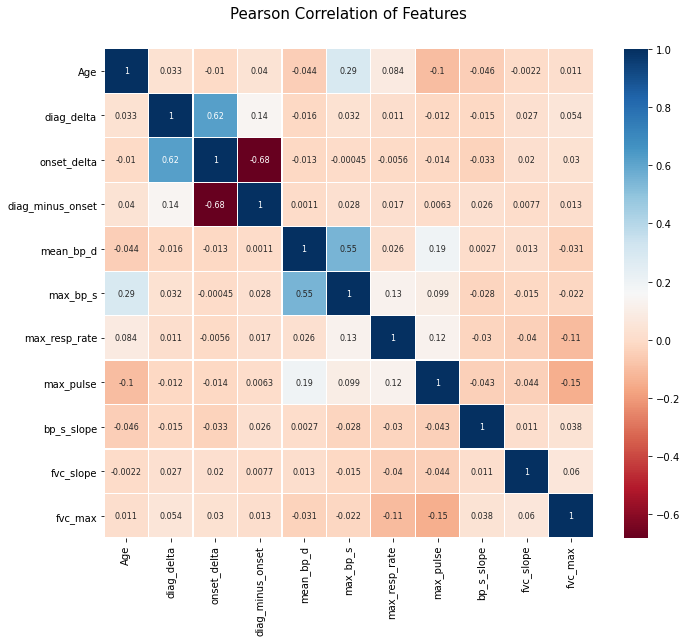

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(11, 9))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(), linewidths=0.1, vmax=1.0,
	square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":8})

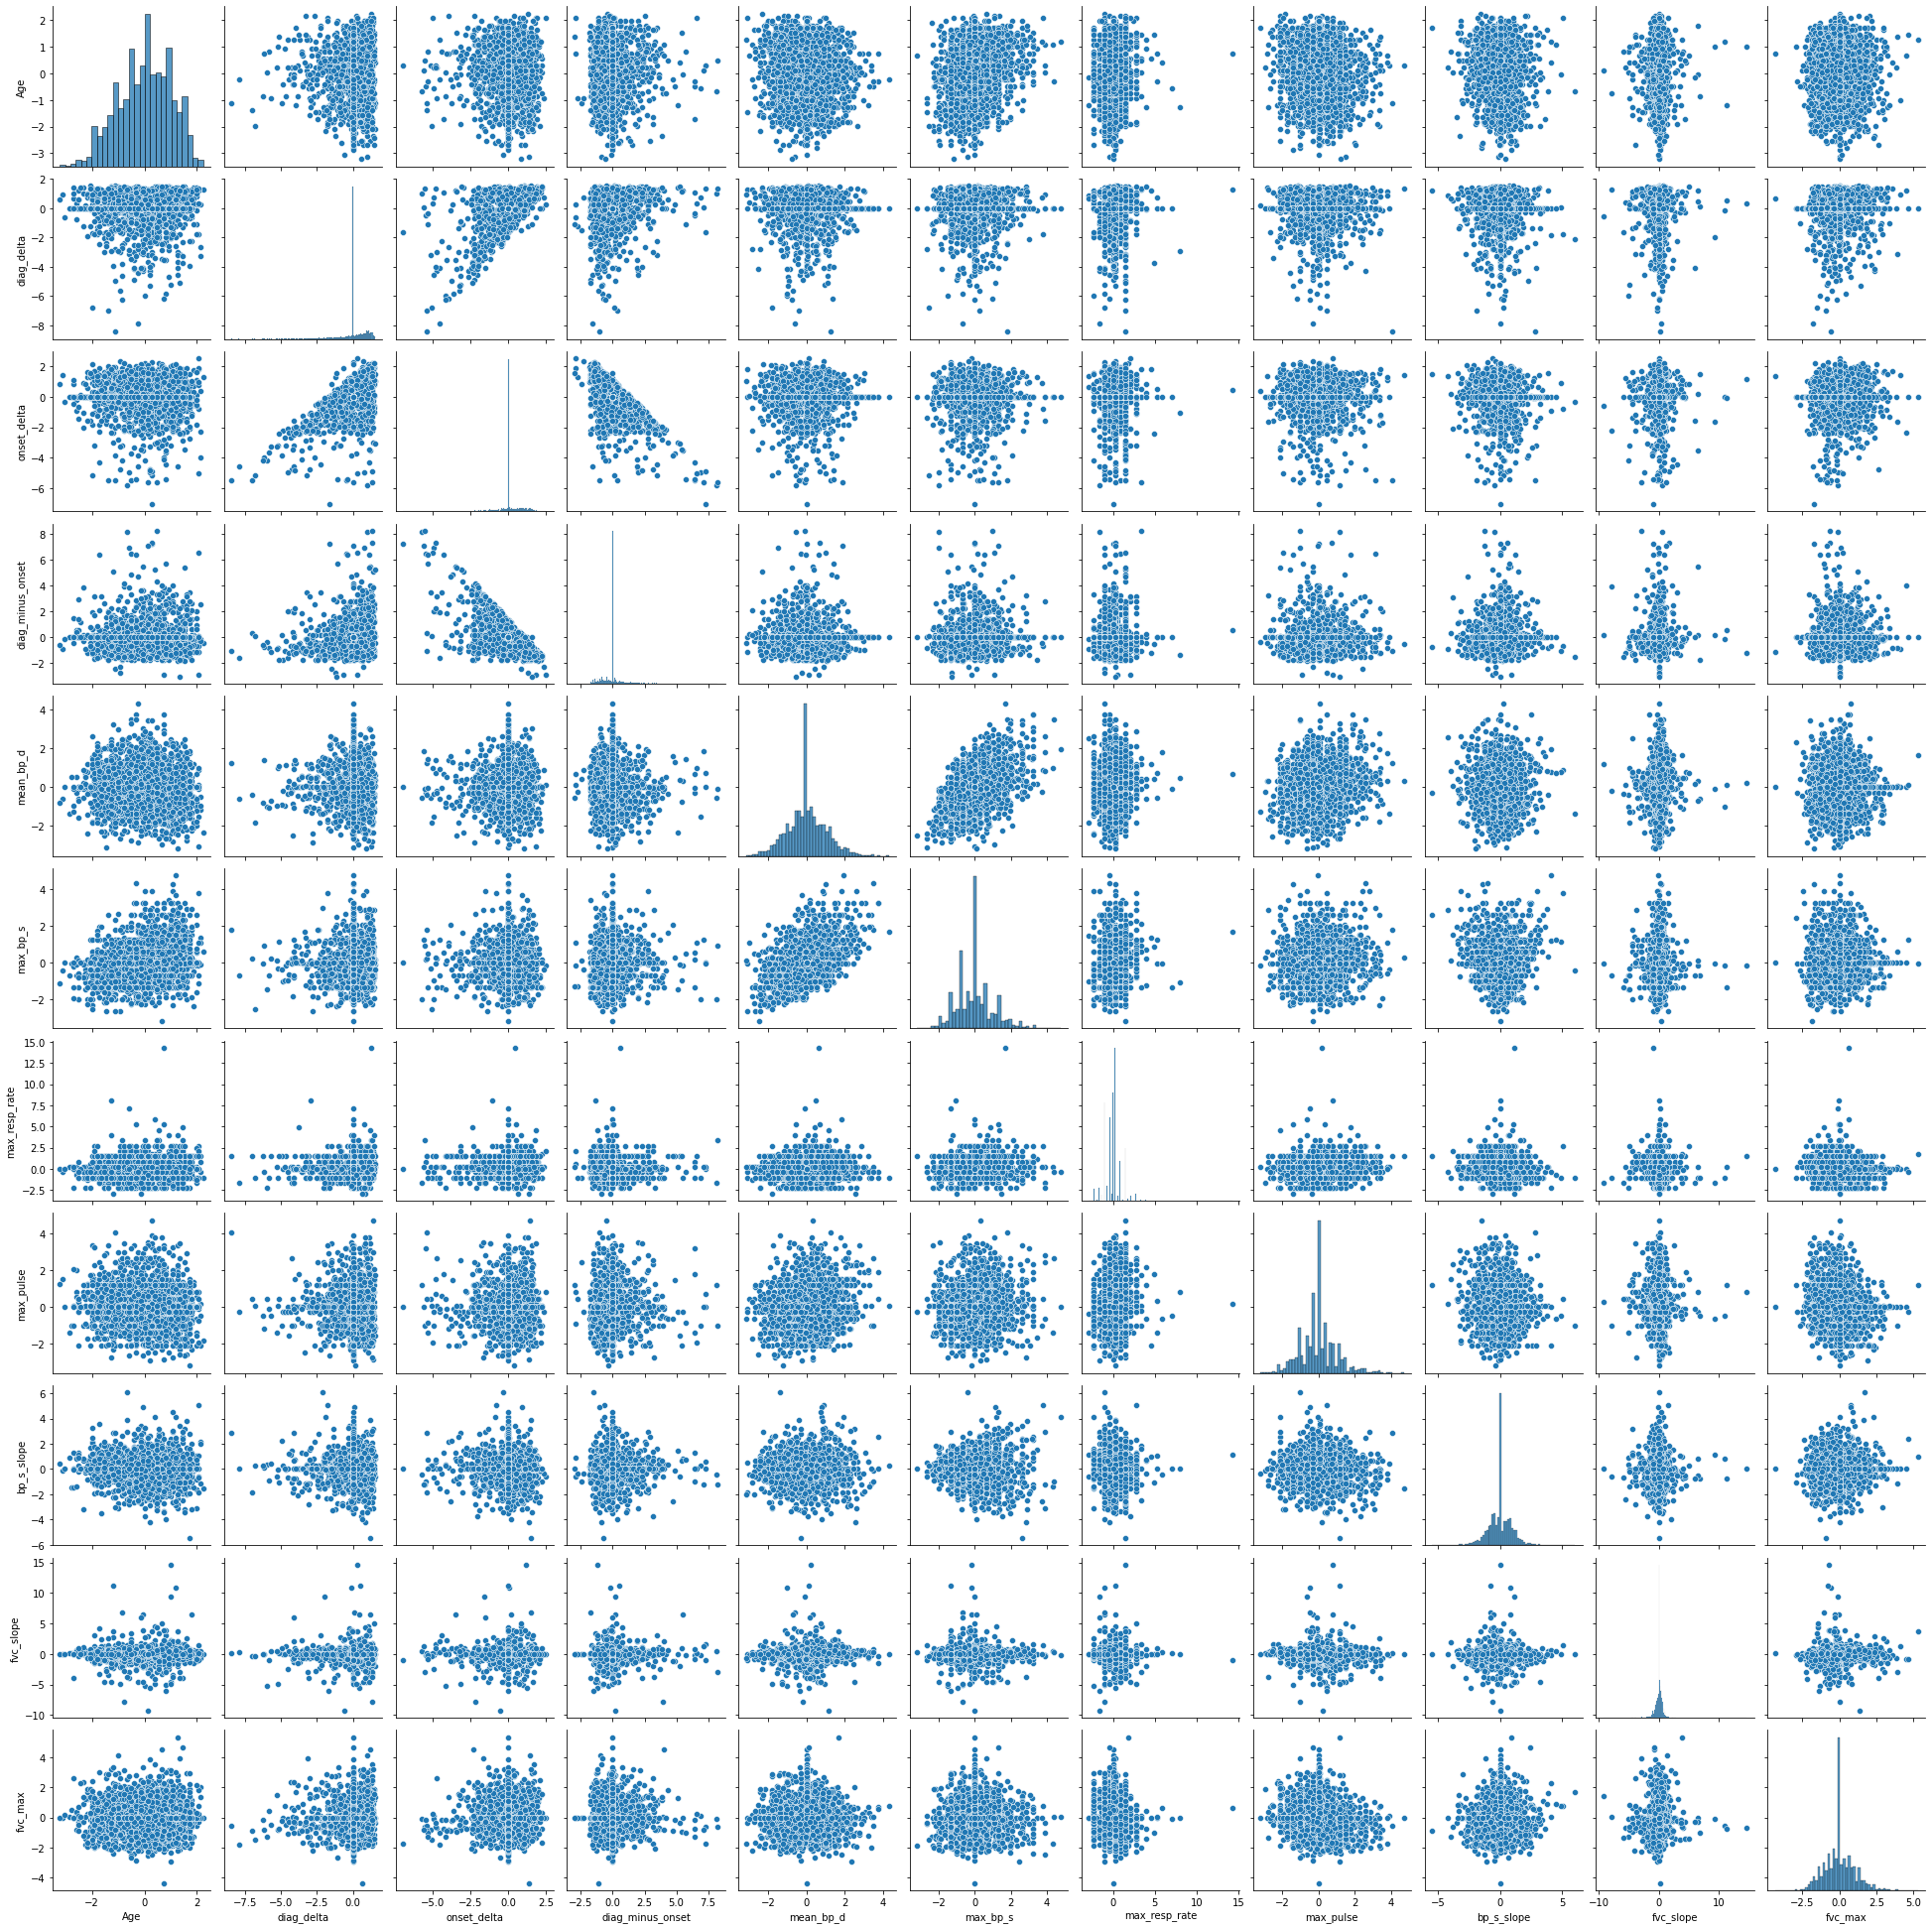

In [25]:
sns.pairplot(X_train)
plt.show()